Dataset is a subset of data collected from [Stanford Open Policing Project](https://openpolicing.stanford.edu/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ri = pd.read_csv('police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [2]:
ri.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91737,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91738,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91739,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [3]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [4]:
ri.shape

(91741, 15)

Since `county_name` has all null values, this column is redundant. Therefore we can drop it from the dataset.
For this dataset, as it is only for Rhode Island (RI), `state` can be dropped as well.

In [5]:
# Dropping the county_name column
ri.drop(['county_name', 'state'], axis = 'columns', inplace = True)

In [6]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


In [7]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [8]:
ri['is_arrested'].head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

In [9]:
ri['is_arrested'] = ri['is_arrested'].astype('bool')

ri['is_arrested'].dtype

dtype('bool')

In [10]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri['stop_date'].str.cat(ri['stop_time'], sep = ' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [11]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [12]:
# Examine the columns
print(ri.columns)

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


In [13]:
ri['stop_outcome'].value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [15]:
ri['stop_outcome'].value_counts().sum()

86536

In [16]:
ri.shape

(86536, 13)

In [17]:
ri['stop_outcome'].value_counts(normalize = True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [18]:
ri.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [20]:
white = ri[ri['driver_race'] == 'White']
white.shape

(61870, 13)

In [21]:
white['stop_outcome'].value_counts(normalize = True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [22]:
asian = ri[ri['driver_race'] == 'Asian']
asian['stop_outcome'].value_counts(normalize = True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

In [23]:
ri['violation'].value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [24]:
ri['violation'].value_counts(normalize = True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

In [25]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

# Compute the violations by female drivers (as proportions)
print(female['violation'].value_counts(normalize = True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


In [26]:
# Compute the violations by male drivers (as proportions)
print(male['violation'].value_counts(normalize = True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


In [27]:
female_and_arrested = ri[(ri['driver_gender'] == 'F') & (ri['is_arrested'] == True)]
female_and_arrested.shape

(669, 13)

In [28]:
female_or_arrested = ri[(ri['driver_gender'] == 'F') | (ri['is_arrested'] == True)]
female_or_arrested.shape

(26183, 13)

In [29]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['driver_gender'] == 'F') & (ri['violation'] == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri['driver_gender'] == 'M') & (ri['violation'] == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [30]:
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

In [31]:
ri['is_arrested'].value_counts(normalize = True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [32]:
ri['is_arrested'].mean()

0.0355690117407784

In [33]:
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [35]:
ri.groupby('district')['is_arrested'].mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

In [36]:
ri.groupby(['district', 'driver_gender'])['is_arrested'].mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [37]:
# Check the data type of 'search_conducted'
print(ri['search_conducted'].dtype)

# Calculate the search rate by counting the values
print(ri['search_conducted'].value_counts(normalize = True))

# Calculate the search rate by taking the mean
print(ri['search_conducted'].mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


In [38]:
# Calculate the search rate for female drivers
print(ri[ri['driver_gender'] == 'F'].search_conducted.mean())

0.019180617481282074


In [39]:
# Calculate the search rate for male drivers
print(ri[ri['driver_gender'] == 'M'].search_conducted.mean())

0.04542557598546892


In [41]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [42]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


In [43]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


In [44]:
ri['inventory'] = ri['search_type'].str.contains('Inventory', na=False)

ri['inventory'].dtype

dtype('bool')

In [45]:
ri['inventory'].sum()

441

In [46]:
searched = ri[ri['search_conducted'] == True]
searched['inventory'].mean()

0.13335349259147264

In [47]:
# Count the 'search_type' values
print(ri['search_type'].value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri['frisk'].dtype)

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [48]:
# Take the sum of 'frisk'
print(ri['frisk'].sum())

303


In [49]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.09162382824312065


In [50]:
# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender')['frisk'].mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


In [51]:
# Calculate the overall arrest rate
print(ri['is_arrested'].mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


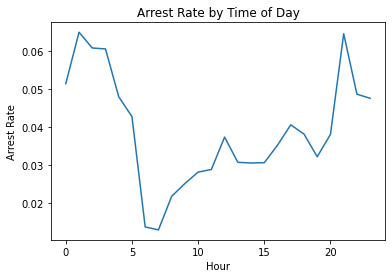

In [52]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

In [55]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


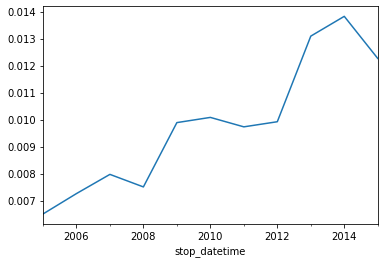

In [56]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

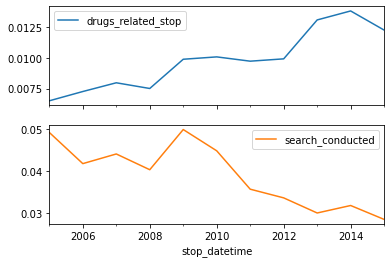

In [57]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()